In [9]:
from skimage import data, io, feature, util, transform
import numpy as np
from matplotlib import pyplot as plt
from skimage import color
%matplotlib inline
import pandas as pd
from scipy.stats import kurtosis, skew, entropy
from scipy.ndimage import variance
import math
import os

Untuk mengubah gambar menjadi array, hanya diperlukan modul 'skimage.io'.
Array yang dihasilkan berupa array numpy dimensi 3

In [10]:
f = io.imread('Pictures/F15/f15.jpg')

# untuk resize picture
# f = transform.resize(f, (200, 300), anti_aliasing=False)

f.shape

(800, 1200, 3)

plt.hist(io.imread('Pictures/F15/f15.jpg', ),256,[0,256])
plt.show()

Namun, jika dibuka dalam bentuk grayscale, maka array yang dihasilkan
adalah numpy array 2 dimensi

In [11]:
def make_matrix_resized(photo):
    return transform.resize(photo, (photo.shape[0] // 4, photo.shape[1] // 4),
                       anti_aliasing=True)

In [12]:
os.listdir("C:/Tugas/PPDM/Tugas 2/Pictures/Happy")

['happy-0401.jpg',
 'happy-0402.jpg',
 'happy-0403.jpg',
 'happy-0404.jpg',
 'happy-0405.jpg',
 'happy-0406.jpg',
 'happy-0407.jpg',
 'happy-0408.jpg',
 'happy-0409.jpg',
 'happy-0410.jpg']

In [13]:
def show_photo_preview(number, emotion):

    if emotion.lower() == 'happy':
        happy = "C:/Tugas/PPDM/Tugas 2/Pictures/Happy"

        for i in os.listdir(happy):
            if number in i:
                io.imshow(io.imread(happy + '/' + i, pilmode='L'))
    
    if emotion.lower() == 'neutral':
        neutral = "C:/Tugas/PPDM/Tugas 2/Pictures/Neutral"

        for i in os.listdir(neutral):
            if number in i:
                io.imshow(io.imread(neutral + '/' + i, pilmode='L'))

    if emotion.lower() == 'sad':            
        sad = "C:/Tugas/PPDM/Tugas 2/Pictures/Sad"

        for i in os.listdir(sad):
            if number in i:
                io.imshow(io.imread(sad + '/' + i, pilmode='L'))


In [14]:
def image_hist(picture_dir):

    pic = io.imread(picture_dir, pilmode='L')
    plt.hist(pic.flatten(), bins=256)

In [15]:
def calc_glcm_for_each_photo(photo, emotion):
    
    features = ['dissimilarity', 'correlation', 'homogeneity', 'contrast', 'ASM', 'energy']
    angle = [0, 45, 90, 135]

    def count_ent_idm_and_var(glcm):

        Ent = [0.0]*4
        Idm = [0.0]*4
        Var = [0.0]*4

        for angle in range(4):
            Var[angle] += variance(glcm[:,:,0,angle].flatten())
            for i in range(256):
                for j in range(256):
                    Idm[angle] += glcm[i][j][0][angle] / (1 + ((i - j)**2))
                    if glcm[i][j][0][angle] > 0.0:
                        Ent[angle] += glcm[i][j][0][angle] * math.log(glcm[i][j][0][angle])
        return [-i for i in Ent], Idm, Var
    
    props = {'Angle': angle,
             'Emotion': [emotion]*4}
    
    glcm = feature.graycomatrix(photo, distances=[2], angles=angle, levels=256,
                        symmetric=True, normed=True)
    
    for i in  features:
        props[i.capitalize()] = feature.graycoprops(glcm, prop=i).flatten()

    ent, idm, var = count_ent_idm_and_var(glcm)
    props['Entropy'] = ent
    props['IDM'] = idm
    props['Variance'] = var

    props = pd.DataFrame(props)
    return props

In [16]:
def concat_calculation(photos, emotions):
    empty = {'Picture': [],
             'Angle':[],
             'Emotion':[]}
    features = ['dissimilarity', 'correlation', 'homogeneity', 'contrast', 'ASM', 'energy', 'entropy']

    for i in features:
        empty[i.capitalize()] = np.array([])
    empty = pd.DataFrame(empty)
    
    for x, y in zip(photos, emotions):
        data = calc_glcm_for_each_photo(x, y)
        empty = pd.concat([empty, data], ignore_index=True)
        
    a = 1
    j = 401
    for i in empty.index:
        empty.loc[i, 'Picture'] = emotions[0] + '-' + str(j)
        a += 1
        if a > 4 and a % 4 == 1:
            j += 1

    return empty

In [17]:
def first_order_stat(photos, emotion):

    empty = {'Picture':[emotion[0]  + '-' + str(i+401) for i in range(len(photos))],
             'Emotion':[i for i in emotion]}

    empty['Mean'] = [np.mean(photos[i].flatten()) for i in range(len(photos))]
    empty['Skewness'] = [skew(photos[i].flatten()) for i in range(len(photos))]
    empty['Kurtosis'] = [kurtosis(photos[i].flatten(), fisher=True) for i in range(len(photos))]
    empty['Variation'] = [variance(photos[i]) for i in range(len(photos))]
    empty['Entropy'] = [entropy(photos[i].flatten(), base=2) for i in range(len(photos))]

    return pd.DataFrame(empty)


In [18]:
# def show_glcm_matrix(photos):
pd.DataFrame([1,2,3,4,5])

,0
0,1
1,2
2,3
3,4
4,5


In [19]:
# Get the list of all files and directories
happy = "C:/Tugas/PPDM/Tugas 2/Pictures/Happy"
neutral = "C:/Tugas/PPDM/Tugas 2/Pictures/Neutral"
sad = "C:/Tugas/PPDM/Tugas 2/Pictures/Sad"

In [20]:
happy = [happy + '/' + i for i in os.listdir(happy)]
neutral = [neutral + '/' + i for i in os.listdir(neutral)]
sad = [sad + '/' + i for i in os.listdir(sad)]

In [21]:
happy = [io.imread(i, pilmode='L') for i in happy]
neutral = [io.imread(i, pilmode='L') for i in neutral]
sad = [io.imread(i, pilmode='L') for i in sad]

In [22]:
kurtosis(happy[2].flatten(), fisher=True)

-1.0244314125352938

In [23]:
skew(happy[9].flatten())
variance(happy[9].flatten())

1202.3017909673997

In [34]:
df = concat_calculation(neutral, ['Neutral']*len(neutral)).sort_values(by=['Angle', 'Picture'], ascending=[True, True])
pivot = df[df['Angle'] == 0].pivot(index='Angle', columns='Picture', values='Dissimilarity')

Picture,Neutral-401,Neutral-402,Neutral-403,Neutral-404,Neutral-405,Neutral-406,Neutral-407,Neutral-408,Neutral-409,Neutral-410
Angle,,,,,,,,,,
0.0,21.743207,16.348732,25.099185,14.507246,15.964674,25.153986,26.577899,17.083333,14.834692,24.55163


In [42]:
def hist_for_second(photo, angle, emotion):

    df = concat_calculation(photo, [emotion]*len(photo))
    for i in df.columns[3:]:
        df[df['Angle'] == angle].plot.bar(x='Picture', y=i)

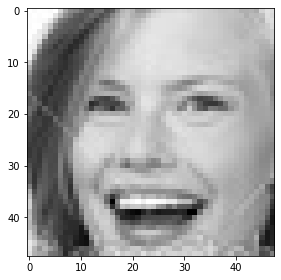

In [25]:
show_photo_preview(str(401), 'happy')

In [26]:
first_order_stat(happy, ['Happy']*len(happy))

,Picture,Emotion,Mean,Skewness,Kurtosis,Variation,Entropy
0,Happy-401,Happy,158.420573,-0.703639,-0.543212,2979.300983,11.070261
1,Happy-402,Happy,151.363715,-0.246192,-0.743187,2617.888545,11.080087
2,Happy-403,Happy,151.328993,-0.148123,-1.024431,4309.881347,11.017912
3,Happy-404,Happy,93.166667,1.064977,3.162038,940.937500,11.094525
4,Happy-405,Happy,104.887587,0.152719,-1.457738,6467.455679,10.659247
5,Happy-406,Happy,143.728299,-0.907583,0.874269,1528.637984,11.107688
6,Happy-407,Happy,142.516493,-0.797765,-0.876988,5561.364311,10.892884
7,Happy-408,Happy,138.551649,-0.279537,-1.493056,6206.262957,10.891663
8,Happy-409,Happy,130.196615,-0.687641,0.489257,1733.475666,11.082827
9,Happy-410,Happy,97.946181,0.207447,0.970323,1202.301791,11.072690


In [27]:
def count_ent_and_idm(glcm):

        Ent = [0.0]*4
        Idm = [0.0]*4

        for angle in range(4):
            for i in range(256):
                for j in range(256):
                    Idm[angle] += glcm[i][j][0][angle] / (1 + ((i - j)**2))
                    if glcm[i][j][0][angle] > 0.0:
                        Ent[angle] += glcm[i][j][0][angle] * math.log(glcm[i][j][0][angle])
        return [-i for i in Ent], Idm
    
    
glcm = feature.graycomatrix(happy[9], distances=[2], angles=[0, 45, 90, 135], levels=256,
                        symmetric=True, normed=True)

count_ent_and_idm(glcm)

([8.040946665697465, 7.984030568391296, 7.980806852922381, 8.040946665697465],
 [0.051916215005943976,
  0.07402126404314466,
  0.054517530684059096,
  0.051916215005943976])